In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
data_x =pd.read_csv("Movie_collection_Independent.csv")

In [ ]:
data_y =pd.read_csv("Movie_collection_Target.csv")

In [ ]:
data_x.shape

(506, 19)

In [ ]:
data_y.shape

(506, 1)

In [ ]:
data_x.head(5)

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [ ]:
data_y.head(5)

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


In [ ]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test =train_test_split(data_x,data_y,random_state =42)
x_train,x_valid,y_train,y_valid =train_test_split(x_train_full,y_train_full,random_state =42)

In [ ]:
x_train.shape

(284, 19)

In [ ]:
x_valid.shape

(95, 19)

In [ ]:
x_test.shape

(127, 19)

In [ ]:
y_train.shape

(284, 1)

In [ ]:
y_test.shape

(127, 1)

In [ ]:
y_valid.shape

(95, 1)

In [ ]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_valid = np.asarray(x_valid)
y_valid = np.asarray(y_valid)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train =scalar.fit_transform(x_train)
x_valid =scalar.transform(x_valid)
x_test = scalar.transform(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
x_train.shape

(284, 19)

In [ ]:
model = keras.models.Sequential([
keras.layers.Dense(30,activation="relu",input_shape =[19]),
keras.layers.Dense(30,activation="relu"),
keras.layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                600       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'mean_squared_error',optimizer =keras.optimizers.SGD(lr=1e-3),metrics =["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_history = model.fit(x_train,y_train,epochs =100,validation_data =(x_valid,y_valid))

Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 7.6430 - mae: 2.6619 - val_loss: 7.4087 - val_mae: 2.6199
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 5.8750 - mae: 2.3122 - val_loss: 5.9614 - val_mae: 2.3288
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 4.6160 - mae: 2.0258 - val_loss: 4.8729 - val_mae: 2.0806
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 3.6731 - mae: 1.7794 - val_loss: 4.0252 - val_mae: 1.8648
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 2.9491 - mae: 1.5607 - val_loss: 3.3547 - val_mae: 1.6778
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 2.3923 - mae: 1.3747 - val_loss: 2.8238 - val_mae: 1.5114
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 1.9661 - mae: 1.2156 - val_loss: 2.4016 - val_mae: 1.3662
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 1.6400 - mae: 1.0785 - va

In [ ]:
mae_test =model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2473 - mae: 0.3684


In [ ]:
model_history.history

{'loss': [7.643045902252197,
  5.87502384185791,
  4.615972995758057,
  3.6731321811676025,
  2.9490725994110107,
  2.392319440841675,
  1.9661129713058472,
  1.6399775743484497,
  1.3952336311340332,
  1.2086378335952759,
  1.0697427988052368,
  0.9661034345626831,
  0.8868568539619446,
  0.8245323896408081,
  0.7747146487236023,
  0.734935462474823,
  0.7006781697273254,
  0.6714184880256653,
  0.6454845070838928,
  0.622272253036499,
  0.6003596186637878,
  0.58092200756073,
  0.5619924664497375,
  0.5443352460861206,
  0.5279247164726257,
  0.5122222900390625,
  0.49780896306037903,
  0.48311981558799744,
  0.46983981132507324,
  0.45678770542144775,
  0.44416603446006775,
  0.4326789081096649,
  0.42167651653289795,
  0.41063958406448364,
  0.40059614181518555,
  0.3911300003528595,
  0.38172104954719543,
  0.37240177392959595,
  0.36393222212791443,
  0.3558695614337921,
  0.34782516956329346,
  0.3402309715747833,
  0.33316320180892944,
  0.3260314166545868,
  0.3193664252758026

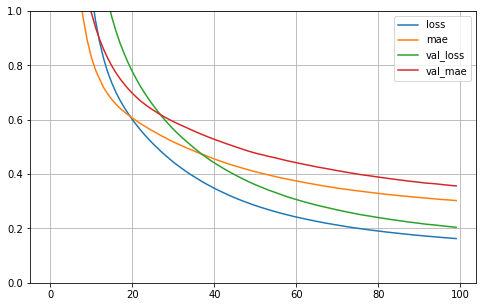

In [ ]:
pd.DataFrame(model_history.history).plot(figsize =(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
x_new = x_test[:5]

In [ ]:
x_new

array([[-0.44266208, -1.02614886,  0.38963381,  0.17868888,  0.53249944,
         0.51973978,  0.49371081,  0.54760731,  0.56866681, -0.29573723,
         0.24587303,  1.2119233 , -1.47737723,  1.65755423, -0.06831227,
         0.83094897, -0.72586619, -0.50659369,  1.48020648],
       [-0.4472429 , -0.69071378,  0.92307081,  0.66563386, -1.30219665,
        -0.07919485, -0.13613263, -0.16729666, -0.04627728,  0.8956014 ,
         0.86778136,  1.68205187, -0.21397019, -0.67366446, -1.12199413,
        -1.20344334,  1.37766439, -0.50659369, -0.67558142],
       [-0.44085257,  2.34099388, -0.44862433, -0.43782334,  1.05925789,
         0.92200931,  0.88680459,  0.86287552,  0.85145132, -1.33815853,
        -0.98658199, -0.48441691,  0.91469946,  0.69291202,  0.14427266,
        -1.20344334, -0.72586619, -0.50659369,  1.48020648],
       [-0.44268023, -0.06532636,  1.21095744, -0.32107045, -2.20162774,
        -0.64237218, -0.57389615, -0.71346553, -0.65673272, -1.07010734,
         0.723

In [ ]:
y_pred = model.predict(x_new)

In [ ]:
y_pred

array([[2.4928284],
       [2.4419906],
       [1.7999651],
       [2.38885  ],
       [1.5561043]], dtype=float32)

In [ ]:
y_test[5:]

,Collection
76,2.000000
316,1.853333
140,1.600000
471,1.973333
500,1.786667
...,...
418,1.253333
117,1.946667
42,2.353333
322,2.026667
